<a href="https://colab.research.google.com/github/dralvima/IITmethods/blob/main/Phi_EVPs_different_neurons_PHI_UP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TIME SERIES OF PHI**

First, let's install PyPhi for IIT4.0

In [1]:
!pip install -U git+https://github.com/wmayner/pyphi.git@feature/iit-4.0
import itertools
import pyphi
# Disable PyPhi progress bars and welcome message
pyphi.config.PROGRESS_BARS = False
pyphi.config.WELCOME_OFF = True

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

  Cloning https://github.com/wmayner/pyphi.git (to revision feature/iit-4.0) to /tmp/pip-req-build-bg_b1w5l
  Running command git clone --filter=blob:none --quiet https://github.com/wmayner/pyphi.git /tmp/pip-req-build-bg_b1w5l
  Resolved https://github.com/wmayner/pyphi.git to commit 83e887db466ed0c617cfb637f94a13d2aae8eea2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.6/662.6 kB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━

**Next, let's access DANDI and grab data in NWB format**

In [2]:
!pip install dandi

!pip install pynwb
from pynwb import NWBHDF5IO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.0/332.0 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.0/134.0 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 22.3 MB/s eta 0:00:00
  Preparing metadata (set

The data we are interested in is: https://dandiarchive.org/dandiset/000021?search=000021&pos=1

Allen Institute October 2019 Mouse extracellular electrophysiology data approximately matching two-photon brain observatory stimulus set.

https://portal.brain-map.org/explore/circuits/visual-coding-neuropixels


In [3]:
!dandi download https://dandiarchive.org/dandiset/000021/draft/files?location=sub-699733573%2F

PATH                                                                  SIZE     DONE            DONE% CHECKSUM STATUS          MESSAGE
sub-699733573/sub-699733573_ses-715093703_probe-810755797_ecephys.nwb 2.1 GB   2.1 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703_probe-810755799_ecephys.nwb 2.5 GB   2.5 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703_probe-810755801_ecephys.nwb 2.2 GB   2.2 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703_probe-810755803_ecephys.nwb 2.3 GB   2.3 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703.nwb                         2.9 GB   2.9 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703_probe-810755807_ecephys.nwb 1.3 GB   1.3 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703_probe-810755805_ecep

In [4]:
filepath = '/content/sub-699733573/sub-699733573_ses-715093703.nwb'
io = NWBHDF5IO(filepath, 'r',load_namespaces = True)  # open the file in read mode 'r'
nwb = io.read() # nwb dataset

/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


**Select trials (by stimulus)**

In [5]:
# grab all the flash presentation data
intervals_dict = nwb.intervals
print(intervals_dict)
stimulus_presentations = intervals_dict['drifting_gratings_presentations'].to_dataframe()
stim_on_times = stimulus_presentations.start_time[:].to_numpy()
N_trials = len(stim_on_times)

{'drifting_gratings_presentations': drifting_gratings_presentations pynwb.epoch.TimeIntervals at 0x135250103467456
Fields:
  colnames: ['start_time' 'stop_time' 'stimulus_name' 'stimulus_block'
 'temporal_frequency' 'color' 'mask' 'opacity' 'phase' 'size' 'units'
 'stimulus_index' 'orientation' 'spatial_frequency' 'contrast' 'tags'
 'timeseries']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    stimulus_name <class 'hdmf.common.table.VectorData'>,
    stimulus_block <class 'hdmf.common.table.VectorData'>,
    temporal_frequency <class 'hdmf.common.table.VectorData'>,
    color <class 'hdmf.common.table.VectorData'>,
    mask <class 'hdmf.common.table.VectorData'>,
    opacity <class 'hdmf.common.table.VectorData'>,
    phase <class 'hdmf.common.table.VectorData'>,
    size <class 'hdmf.common.table.VectorData'>,
    units <class 'hdmf.common.table.VectorData'>,
    stimulus_index <class 'hdmf.common.table.Vect

# extract spiking data

In [6]:
# make a dataframe of the units
units_df = nwb.units.to_dataframe()
units_df.columns

Index(['snr', 'quality', 'presence_ratio', 'spread', 'cumulative_drift',
       'isolation_distance', 'amplitude', 'firing_rate', 'nn_hit_rate',
       'isi_violations', 'velocity_below', 'l_ratio', 'nn_miss_rate',
       'waveform_halfwidth', 'repolarization_slope', 'amplitude_cutoff',
       'PT_ratio', 'silhouette_score', 'recovery_slope', 'waveform_duration',
       'local_index', 'max_drift', 'velocity_above', 'cluster_id',
       'peak_channel_id', 'd_prime', 'spike_times', 'spike_amplitudes',
       'waveform_mean'],
      dtype='object')

In [7]:
# determine the brain areas that each electrode was recorded in
elLocationLabel = nwb.electrodes["location"].data[:]
import numpy as np
x = np.array(elLocationLabel)
locIdx_LGd = np.where(x == 'LGd')
locIdx_VISp = np.where(x == 'VISp')
locIdx_VISpm = np.where(x == 'VISpm')
locIdx_VISl = np.where(x == 'VISl')
locIdx_VISrl = np.where(x == 'VISrl')
# map the locations to specific probe IDs
elLocationID = nwb.electrodes["id"].data[:]
elID_LGd   = elLocationID[locIdx_LGd]
elID_VISp   = elLocationID[locIdx_VISp]
elID_VISpm   = elLocationID[locIdx_VISpm]
elID_VISl   = elLocationID[locIdx_VISl]
elID_VISrl   = elLocationID[locIdx_VISrl]

# Find 'good' units
y = np.array(units_df.quality)
goodUnit = np.where(y == 'good')[0]
cids = units_df.peak_channel_id.to_list()
unitsToUse_idx_LGd = [a for a in goodUnit if cids[a] in elID_LGd]
unitsToUse_idx_VISp = [a for a in goodUnit if cids[a] in elID_VISp]
unitsToUse_idx_VISpm = [a for a in goodUnit if cids[a] in elID_VISpm]
unitsToUse_idx_VISl = [a for a in goodUnit if cids[a] in elID_VISl]
unitsToUse_idx_VISrl = [a for a in goodUnit if cids[a] in elID_VISrl]
# collect good units per area
unitsToUse_LGd = nwb.units[unitsToUse_idx_LGd]
unitsToUse_VISp = nwb.units[unitsToUse_idx_VISp]
unitsToUse_VISpm = nwb.units[unitsToUse_idx_VISpm]
unitsToUse_VISl = nwb.units[unitsToUse_idx_VISl]
unitsToUse_VISrl = nwb.units[unitsToUse_idx_VISrl]

**TRIAL-AVERAGE to get stimulus-locked RESPONSES**

In [8]:
# define time window pre and post stimulus onset
pre = 0.5
post = 2
dt = 10. / 1000 # 10 ms bins
T_trial = int((pre + post) / dt) # number of time bins in a trial
bin_edges = -pre + np.arange(T_trial+1) * dt

*compute V1 response*

In [9]:
unitsToUse = unitsToUse_VISp

# Construct trials for
N_neurons = len(unitsToUse) # for V1/VISp there are 135 'good' units
ys = []
for time in stim_on_times:
  y_trial = np.zeros((T_trial, N_neurons))
  for unit in range(N_neurons):
    unit_spike_times = unitsToUse['spike_times'].iloc[unit]
    # compute spike times relative to stimulus onset
    aligned_spikes = unit_spike_times - time
    # keep only spike times in a given time window around the stimulus onset
    aligned_spikes = aligned_spikes[(-pre < aligned_spikes) & (aligned_spikes < post)]
    # bin spikes
    y_trial[:,unit] = np.histogram(aligned_spikes, bins=bin_edges)[0]
  ys.append(y_trial.astype(int))

**pick three neurons and convert spike trains to SDF**

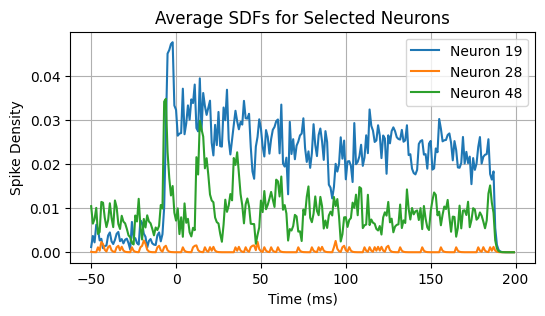

In [10]:
import scipy.signal

# Define an EPSP-shaped kernel
def create_epsp_kernel(peak_time=1, decay_time=5, total_duration=25, sampling_rate=1):
    """
    Create an EPSP-shaped kernel with specified peak time, decay time, total duration, and sampling rate.
    The kernel will have a rapid rise to a peak and an exponential decay.
    """
    time = np.arange(0, total_duration, sampling_rate)
    rise = np.exp(-time / peak_time)  # Rise part of the EPSP
    decay = np.exp(-time / decay_time)  # Decay part of the EPSP
    epsp_kernel = rise * decay
    epsp_kernel /= np.sum(epsp_kernel)  # Normalize the kernel
    return epsp_kernel

# Create the EPSP kernel
epsp_kernel = create_epsp_kernel()

# Function to convert a spike train to an SDF using the EPSP kernel
def spike_train_to_sdf(spike_train, kernel):
    """
    Convert a spike train to a spike density function (SDF) using a specified kernel.
    """
    return scipy.signal.convolve(spike_train, kernel, mode='same')

# average SDFs for each of the three neurons: 12, 23, and 58
'''
neuron_indices = [11, 22, 57]
'''
neuron_indices = [18, 27, 47]
average_sdfs = np.zeros((3, 250))  # 3 neurons, 250 time points
for neuron_index, neuron_id in enumerate(neuron_indices):
    sdfs = []
    for trial in ys:
        sdf = spike_train_to_sdf(trial[:, neuron_id], epsp_kernel)
        sdfs.append(sdf[:250])  # Ensuring the length matches the original time series
    average_sdfs[neuron_index] = np.mean(sdfs, axis=0)

# Time range from -50ms to 200ms
time_range = np.arange(-50, 200)

# Plotting the average SDFs of all three neurons with the adjusted time range
plt.figure(figsize=(6, 3))
for i in range(3):
    plt.plot(time_range, average_sdfs[i], label=f'Neuron {neuron_indices[i] + 1}')
plt.title('Average SDFs for Selected Neurons')
plt.xlabel('Time (ms)')
plt.ylabel('Spike Density')
plt.xticks(np.arange(-50, 201, 50))  # Setting x-ticks at intervals of 50ms
plt.legend()
plt.grid(True)
plt.show()

**BINARIZING using median**

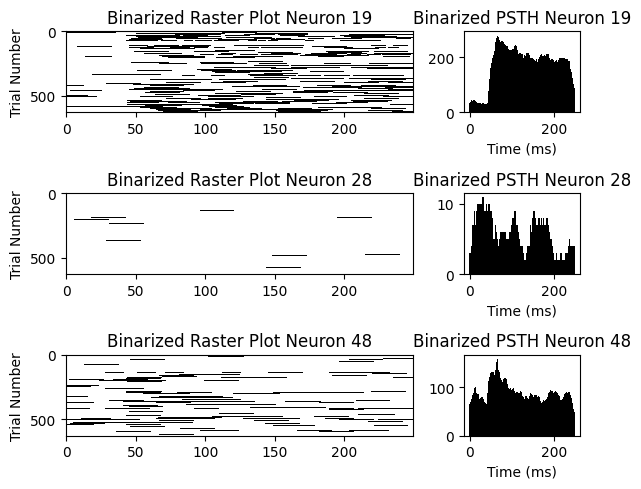

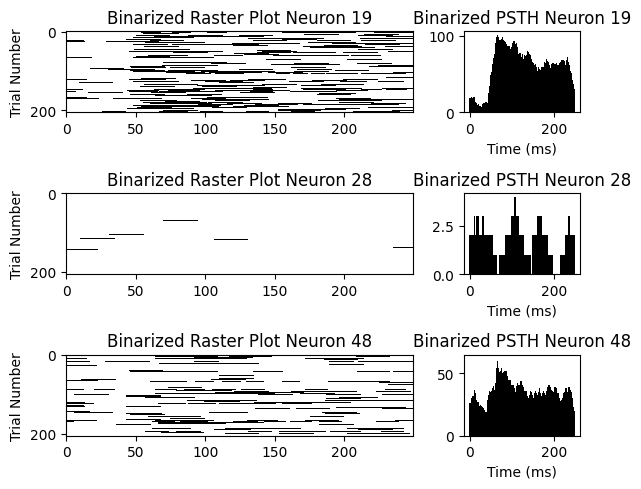

In [11]:
# Binarizing the SDF data for each neuron on a trial-by-trial basis based on the median

# Initialize lists to store binarized SDFs for each neuron
binarized_sdfs_per_neuron = {neuron_id: [] for neuron_id in neuron_indices}

# Binarizing SDFs based on the median for each trial
for trial in ys:
    for neuron_index, neuron_id in enumerate(neuron_indices):
        sdf = spike_train_to_sdf(trial[:, neuron_id], epsp_kernel)
        median_value = np.median(sdf)
        binarized_sdf = np.where(sdf > median_value, 1, 0)
        binarized_sdfs_per_neuron[neuron_id].append(binarized_sdf)

# Computing the PSTH for the binarized SDF data
psth_per_neuron = {neuron_id: np.sum(np.array(binarized_sdfs), axis=0) for neuron_id, binarized_sdfs in binarized_sdfs_per_neuron.items()}


# Plotting the raster plots and PSTHs for the binarized data of all three neurons
fig, axs = plt.subplots(3, 2, figsize=(6, 5), gridspec_kw={'height_ratios': [3, 3, 3], 'width_ratios': [3, 1]})

for i, neuron_id in enumerate(neuron_indices):
    # Binarized raster plot for each neuron
    axs[i, 0].imshow(np.array(binarized_sdfs_per_neuron[neuron_id]), cmap='Greys', aspect='auto', interpolation='none')
    axs[i, 0].set_title(f'Binarized Raster Plot Neuron {neuron_id + 1}')
    axs[i, 0].set_ylabel('Trial Number')

    # Binarized PSTH for each neuron
    axs[i, 1].bar(range(250), psth_per_neuron[neuron_id], width=1.0, color='black')
    axs[i, 1].set_title(f'Binarized PSTH Neuron {neuron_id + 1}')
    axs[i, 1].set_xlabel('Time (ms)')

plt.tight_layout()
plt.show()


# Identifying the active trials of the middle neuron
active_trials_middle_neuron = [np.any(trial[:, 22]) for trial in ys]

# Recalculating binarized SDFs for each neuron using active trials of the middle neuron
binarized_sdfs_active_trials = []
for neuron_index, neuron_id in enumerate(neuron_indices):
    neuron_sdfs_active_trials = []
    for i, is_active in enumerate(active_trials_middle_neuron):
        if is_active:
            trial = ys[i]
            sdf = spike_train_to_sdf(trial[:, neuron_id], epsp_kernel)
            median_value = np.median(sdf)
            binarized_sdf = np.where(sdf > median_value, 1, 0)
            neuron_sdfs_active_trials.append(binarized_sdf)
    binarized_sdfs_active_trials.append(neuron_sdfs_active_trials)

# Replotting the raster plots and PSTHs for the binarized data using active trials of the middle neuron
fig, axs = plt.subplots(3, 2, figsize=(6, 5), gridspec_kw={'height_ratios': [3, 3, 3], 'width_ratios': [3, 1]})
for i, neuron_id in enumerate(neuron_indices):
    # Binarized raster plot for each neuron
    axs[i, 0].imshow(np.array(binarized_sdfs_active_trials[i]), cmap='Greys', aspect='auto', interpolation='none')
    axs[i, 0].set_title(f'Binarized Raster Plot Neuron {neuron_id + 1}')
    axs[i, 0].set_ylabel('Trial Number')

    # Binarized PSTH for each neuron
    psth_binarized_neuron = np.sum(np.array(binarized_sdfs_active_trials[i]), axis=0)
    axs[i, 1].bar(range(250), psth_binarized_neuron, width=1.0, color='black')
    axs[i, 1].set_title(f'Binarized PSTH Neuron {neuron_id + 1}')
    axs[i, 1].set_xlabel('Time (ms)')

plt.tight_layout()
plt.show()

**compute TPMs**

In [12]:
import seaborn as sns
from itertools import product

def compute_tpm(trial_matrix):
    """
    Compute the Transition Probability Matrix (TPM) for a given trial.
    The TPM is a 2^n x 2^n matrix, where n is the number of neurons (rows in trial_matrix).
    """
    num_neurons = trial_matrix.shape[0]  # Number of neurons inferred from the trial matrix

    # Generate all possible states for n neurons and sort them in the specified order
    states = sorted(product(range(2), repeat=num_neurons), key=lambda x: (sum(x), x))

    # Initialize the TPM with zeros
    tpm = np.zeros((2**num_neurons, 2**num_neurons))

    # Count transitions between states
    for t in range(trial_matrix.shape[1] - 1):
        current_state = tuple(trial_matrix[:, t])
        next_state = tuple(trial_matrix[:, t + 1])

        if current_state in states and next_state in states:
            current_index = states.index(current_state)
            next_index = states.index(next_state)
            tpm[current_index, next_index] += 1

    # Normalize the TPM by row to get probabilities
    row_sums = tpm.sum(axis=1, keepdims=True)
    tpm_normalized = np.divide(tpm, row_sums, out=np.zeros_like(tpm), where=row_sums != 0)

    return tpm_normalized

# Saving all the TPMs for each trial in a variable

# Compute TPM for each trial and store them in a list
all_tpms = [compute_tpm(np.array([binarized_sdfs_active_trials[0][trial],
                                 binarized_sdfs_active_trials[1][trial],
                                 binarized_sdfs_active_trials[2][trial]])) for trial in range(len(binarized_sdfs_active_trials[0]))]

double check

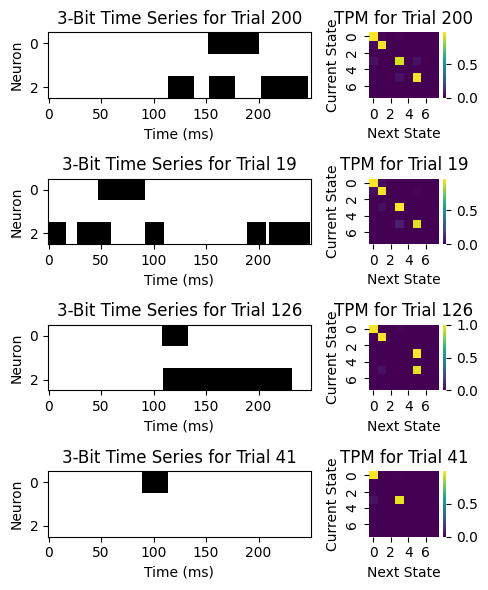

In [13]:
import random

# Selecting 4 random trials
random_trials = random.sample(range(len(all_tpms)), 4)

# Create a figure to show the 3-bit time series and respective TPMs for 4 randomly chosen trials
fig, axs = plt.subplots(4, 2, figsize=(5, 6), gridspec_kw={'width_ratios': [3, 1]})

for i, trial_index in enumerate(random_trials):
    # Plotting the 3-bit time series
    axs[i, 0].imshow(np.array([binarized_sdfs_active_trials[0][trial_index],
                               binarized_sdfs_active_trials[1][trial_index],
                               binarized_sdfs_active_trials[2][trial_index]]), cmap='Greys', aspect='auto', interpolation='none')
    axs[i, 0].set_title(f'3-Bit Time Series for Trial {trial_index + 1}')
    axs[i, 0].set_ylabel('Neuron')
    axs[i, 0].set_xlabel('Time (ms)')

    # Plotting the respective TPM
    sns.heatmap(all_tpms[trial_index], ax=axs[i, 1], cmap='viridis', cbar=True)
    axs[i, 1].set_title(f'TPM for Trial {trial_index + 1}')
    axs[i, 1].set_xlabel('Next State')
    axs[i, 1].set_ylabel('Current State')

plt.tight_layout()
plt.show()

**run PyPhi**

In [14]:
import pyphi
import itertools
import numpy as np
import pickle
import os

# Check if the file already exists
if not os.path.exists('modified_trial_phi_results.pkl'):

  # Setting up the required parameters for pyPhi analysis
  labels = ('A', 'B', 'C')
  num_bits = len(labels)
  possible_states = np.array(list(itertools.product([0, 1], repeat=num_bits)))

  # Function to calculate phi values and states for a single TPM, tracking skipped trials
  def calculate_phi_for_tpm(tpm, possible_states, labels, trial_index):
      converted_tpm = pyphi.convert.sbs2sbn(tpm)
      network = pyphi.Network(converted_tpm, node_labels=labels)
      node_indices = (0, 1, 2)

      phi_values = np.zeros(len(possible_states))
      phi_states = np.zeros((len(possible_states), 3), dtype=int)

      max_phi = -np.inf
      max_phi_state = None
      skipped = False  # Flag to indicate if the trial was skipped

      for i, state in enumerate(possible_states):
          try:
            candidate_system = pyphi.Subsystem(network, state, node_indices)
            phi_structure = pyphi.new_big_phi.phi_structure(candidate_system)
            big_phi = phi_structure.big_phi
            phi_values[i] = big_phi
            phi_states[i] = state
            if big_phi > max_phi:
                max_phi = big_phi
                max_phi_state = state
          except pyphi.exceptions.StateUnreachableError:
            skipped = True
            break

      return phi_values, phi_states, max_phi, max_phi_state, skipped

  # List to keep track of skipped trials
  skipped_trials = []

  # Calculate phi values and states for each trial's TPM, tracking skipped trials
  trial_phi_results = []
  for i, tpm in enumerate(all_tpms):
    phi_values, phi_states, max_phi, max_phi_state, skipped = calculate_phi_for_tpm(tpm, possible_states, labels, i)

    # Fetching the 3-bit time series for the current trial
    # Assuming binarized_sdfs_active_trials is structured as [neuron][trial]
    trial_time_series = np.array([binarized_sdfs_active_trials[neuron][i] for neuron in range(num_bits)]).T

    # Append the 3-bit time series along with the PHI values and states
    trial_phi_results.append((trial_time_series, phi_values, phi_states, max_phi, max_phi_state))

    if skipped:
        skipped_trials.append(i)

  # Saving the results and the list of skipped trials
  with open('modified_trial_phi_results.pkl', 'wb') as file:
    pickle.dump(trial_phi_results, file)

else:
    print("File 'modified_trial_phi_results.pkl' already exists. Skipping computation.")

2023-12-19 20:20:22,168	INFO worker.py:1664 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


Then, assign phi values to state-by-state transitions for each trial

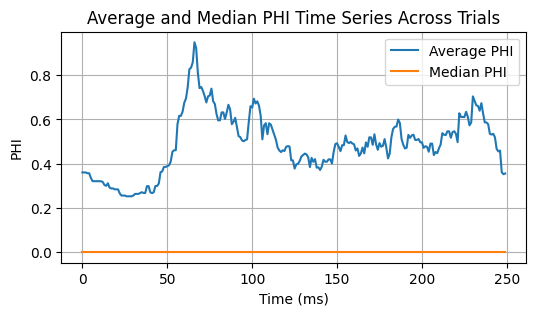

In [15]:
# Extract PHI time series for each trial
phi_time_series_per_trial = []

for trial_data in trial_phi_results:
    trial_time_series, phi_values, phi_states, _, _ = trial_data

    # Create a dictionary mapping states to PHI values for quick lookup
    state_to_phi = {tuple(state): phi for state, phi in zip(phi_states, phi_values)}

    # Create PHI time series for this trial by mapping each state in the time series to its PHI value
    trial_phi_time_series = np.array([state_to_phi.get(tuple(state), 0) for state in trial_time_series])
    phi_time_series_per_trial.append(trial_phi_time_series)

# Compute average and median PHI time series across trials
average_phi_time_series = np.mean(phi_time_series_per_trial, axis=0)
median_phi_time_series = np.median(phi_time_series_per_trial, axis=0)

# Plot the average and median PHI time series
plt.figure(figsize=(6, 3))
plt.plot(average_phi_time_series, label='Average PHI')
plt.plot(median_phi_time_series, label='Median PHI')
plt.title('Average and Median PHI Time Series Across Trials')
plt.xlabel('Time (ms)')
plt.ylabel('PHI')
plt.legend()
plt.grid(True)
plt.show()

add measures of variance

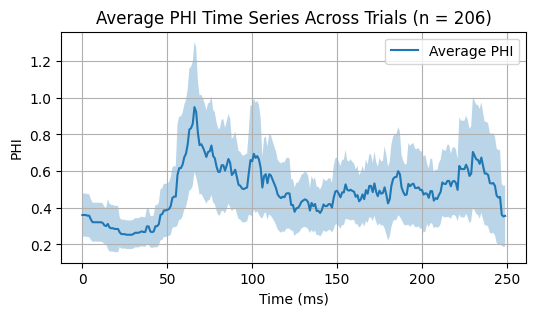

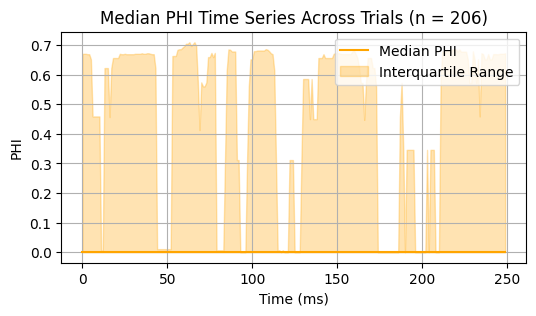

In [16]:
import seaborn as sns
import warnings
# Suppress annoying FutureWarnings from seaborn/panda
warnings.filterwarnings('ignore', category=FutureWarning, message="use_inf_as_na option is deprecated")

# Convert the list of PHI time series into a NumPy array for easier manipulation
phi_time_series_array = np.array(phi_time_series_per_trial)

# Calculate the average PHI time series
average_phi_time_series = np.mean(phi_time_series_array, axis=0)

# Calculate the standard error for the mean (SEM) to use for confidence intervals
sem_phi_time_series = np.std(phi_time_series_array, axis=0, ddof=1) / np.sqrt(phi_time_series_array.shape[0])

# Number of samples (trials) used for averaging
num_samples = phi_time_series_array.shape[0]

# Plot the average PHI time series with confidence intervals
plt.figure(figsize=(6, 3))
sns.lineplot(x=np.arange(average_phi_time_series.size), y=average_phi_time_series, label='Average PHI')
plt.fill_between(np.arange(average_phi_time_series.size),
                 average_phi_time_series - 1.96 * sem_phi_time_series,
                 average_phi_time_series + 1.96 * sem_phi_time_series,
                 alpha=0.3)

plt.title(f'Average PHI Time Series Across Trials (n = {num_samples})')
plt.xlabel('Time (ms)')
plt.ylabel('PHI')
plt.legend()
plt.grid(True)
plt.show()

# For the median, we'll use the interquartile range (IQR) as a measure of variance
# Calculating the 25th and 75th percentiles
percentile_25 = np.percentile(phi_time_series_array, 25, axis=0)
percentile_75 = np.percentile(phi_time_series_array, 75, axis=0)

# Calculate the median PHI time series
median_phi_time_series = np.median(phi_time_series_array, axis=0)

# Plot the median PHI time series with IQR as the measure of variance
plt.figure(figsize=(6, 3))
# Median PHI line plot in orange
sns.lineplot(x=np.arange(median_phi_time_series.size), y=median_phi_time_series, label='Median PHI', color='orange')
# Filling the interquartile range (IQR) with a lighter shade of orange
plt.fill_between(np.arange(median_phi_time_series.size),
                 percentile_25,
                 percentile_75,
                 alpha=0.3, color='orange', label='Interquartile Range')

plt.title(f'Median PHI Time Series Across Trials (n = {num_samples})')
plt.xlabel('Time (ms)')
plt.ylabel('PHI')
plt.legend()
plt.grid(True)
plt.show()

# SHUFFLE CONTROL

In [17]:
import numpy as np
import random

# Assuming binarized_sdfs_active_trials is a list where each element is a neuron's data across trials
num_neurons = len(binarized_sdfs_active_trials)
num_trials = len(binarized_sdfs_active_trials[0])  # Total number of trials

# Create surrogate trials
shuffled_trials_data = []
for trial_idx in range(num_trials):
    surrogate_trial = np.zeros((num_neurons, binarized_sdfs_active_trials[0][trial_idx].shape[0]))
    for neuron_idx in range(num_neurons):
        # Randomly select a trial for this neuron
        random_trial_idx = random.randint(0, num_trials - 1)
        surrogate_trial[neuron_idx, :] = binarized_sdfs_active_trials[neuron_idx][random_trial_idx]
    shuffled_trials_data.append(surrogate_trial)

# Now compute the TPMs for the shuffled data
shuffled_all_tpms = [compute_tpm(trial) for trial in shuffled_trials_data]

In [18]:
import pyphi
import itertools
import numpy as np
import pickle
import os

# Check if the file already exists
if not os.path.exists('modified_shuffled_trial_phi_results.pkl'):

  # Setting up the required parameters for pyPhi analysis
  labels = ('A', 'B', 'C')
  num_bits = len(labels)
  possible_states = np.array(list(itertools.product([0, 1], repeat=num_bits)))

  # Function to calculate phi values and states for a single TPM, tracking skipped trials
  def calculate_phi_for_tpm(tpm, possible_states, labels, trial_index):
      converted_tpm = pyphi.convert.sbs2sbn(tpm)
      network = pyphi.Network(converted_tpm, node_labels=labels)
      node_indices = (0, 1, 2)

      phi_values = np.zeros(len(possible_states))
      phi_states = np.zeros((len(possible_states), 3), dtype=int)

      max_phi = -np.inf
      max_phi_state = None
      skipped = False  # Flag to indicate if the trial was skipped

      for i, state in enumerate(possible_states):
          try:
            candidate_system = pyphi.Subsystem(network, state, node_indices)
            phi_structure = pyphi.new_big_phi.phi_structure(candidate_system)
            big_phi = phi_structure.big_phi
            phi_values[i] = big_phi
            phi_states[i] = state
            if big_phi > max_phi:
                max_phi = big_phi
                max_phi_state = state
          except pyphi.exceptions.StateUnreachableError:
            skipped = True
            break

      return phi_values, phi_states, max_phi, max_phi_state, skipped

  # List to keep track of skipped trials
  skipped_trials = []

  # Calculate phi values and states for each trial's TPM, tracking skipped trials
  trial_phi_results = []
  for i, tpm in enumerate(shuffled_all_tpms):
    phi_values, phi_states, max_phi, max_phi_state, skipped = calculate_phi_for_tpm(tpm, possible_states, labels, i)

    # Fetching the 3-bit time series for the current trial
    # Assuming binarized_sdfs_active_trials is structured as [neuron][trial]
    trial_time_series = np.array([binarized_sdfs_active_trials[neuron][i] for neuron in range(num_bits)]).T

    # Append the 3-bit time series along with the PHI values and states
    trial_phi_results.append((trial_time_series, phi_values, phi_states, max_phi, max_phi_state))

    if skipped:
        skipped_trials.append(i)

  # Saving the results and the list of skipped trials
  with open('modified__shuffled_trial_phi_results.pkl', 'wb') as file:
    pickle.dump(trial_phi_results, file)

else:
    print("File 'modified_trial_phi_results.pkl' already exists. Skipping computation.")

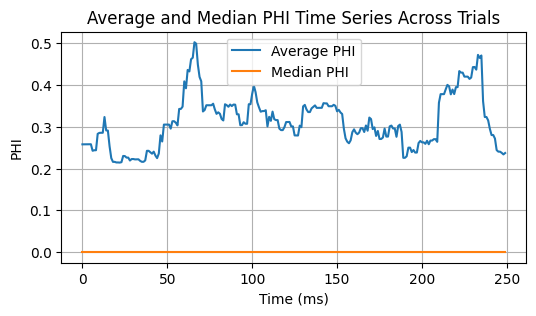

In [19]:
# Extract PHI time series for each trial
phi_time_series_per_trial = []

for trial_data in trial_phi_results:
    trial_time_series, phi_values, phi_states, _, _ = trial_data

    # Create a dictionary mapping states to PHI values for quick lookup
    state_to_phi = {tuple(state): phi for state, phi in zip(phi_states, phi_values)}

    # Create PHI time series for this trial by mapping each state in the time series to its PHI value
    trial_phi_time_series = np.array([state_to_phi.get(tuple(state), 0) for state in trial_time_series])
    phi_time_series_per_trial.append(trial_phi_time_series)

# Compute average and median PHI time series across trials
average_phi_time_series = np.mean(phi_time_series_per_trial, axis=0)
median_phi_time_series = np.median(phi_time_series_per_trial, axis=0)

# Plot the average and median PHI time series
plt.figure(figsize=(6, 3))
plt.plot(average_phi_time_series, label='Average PHI')
plt.plot(median_phi_time_series, label='Median PHI')
plt.title('Average and Median PHI Time Series Across Trials')
plt.xlabel('Time (ms)')
plt.ylabel('PHI')
plt.legend()
plt.grid(True)
plt.show()

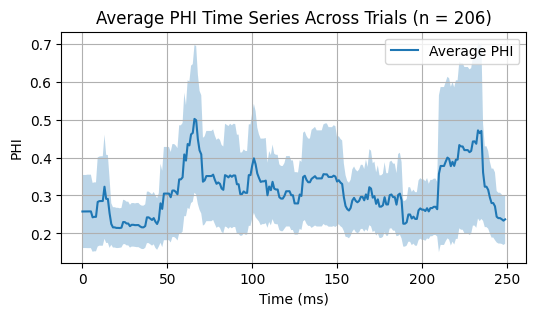

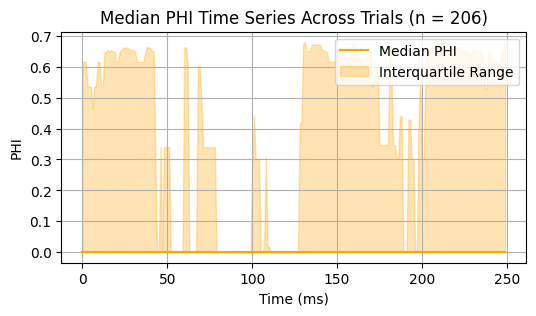

In [20]:
import seaborn as sns
import warnings
# Suppress annoying FutureWarnings from seaborn/panda
warnings.filterwarnings('ignore', category=FutureWarning, message="use_inf_as_na option is deprecated")

# Convert the list of PHI time series into a NumPy array for easier manipulation
phi_time_series_array = np.array(phi_time_series_per_trial)

# Calculate the average PHI time series
average_phi_time_series = np.mean(phi_time_series_array, axis=0)

# Calculate the standard error for the mean (SEM) to use for confidence intervals
sem_phi_time_series = np.std(phi_time_series_array, axis=0, ddof=1) / np.sqrt(phi_time_series_array.shape[0])

# Number of samples (trials) used for averaging
num_samples = phi_time_series_array.shape[0]

# Plot the average PHI time series with confidence intervals
plt.figure(figsize=(6, 3))
sns.lineplot(x=np.arange(average_phi_time_series.size), y=average_phi_time_series, label='Average PHI')
plt.fill_between(np.arange(average_phi_time_series.size),
                 average_phi_time_series - 1.96 * sem_phi_time_series,
                 average_phi_time_series + 1.96 * sem_phi_time_series,
                 alpha=0.3)

plt.title(f'Average PHI Time Series Across Trials (n = {num_samples})')
plt.xlabel('Time (ms)')
plt.ylabel('PHI')
plt.legend()
plt.grid(True)
plt.show()

# For the median, we'll use the interquartile range (IQR) as a measure of variance
# Calculating the 25th and 75th percentiles
percentile_25 = np.percentile(phi_time_series_array, 25, axis=0)
percentile_75 = np.percentile(phi_time_series_array, 75, axis=0)

# Calculate the median PHI time series
median_phi_time_series = np.median(phi_time_series_array, axis=0)

# Plot the median PHI time series with IQR as the measure of variance
plt.figure(figsize=(6, 3))
# Median PHI line plot in orange
sns.lineplot(x=np.arange(median_phi_time_series.size), y=median_phi_time_series, label='Median PHI', color='orange')
# Filling the interquartile range (IQR) with a lighter shade of orange
plt.fill_between(np.arange(median_phi_time_series.size),
                 percentile_25,
                 percentile_75,
                 alpha=0.3, color='orange', label='Interquartile Range')

plt.title(f'Median PHI Time Series Across Trials (n = {num_samples})')
plt.xlabel('Time (ms)')
plt.ylabel('PHI')
plt.legend()
plt.grid(True)
plt.show()